In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [39]:
def generate_performance_comparison_plots(statistics_filename, directory_path):
    # Read statistics table
    statistics_file_path = os.path.join(directory_path, statistics_filename)
    df_statistics = pd.read_csv(statistics_file_path)
    #print("\n df_statistics \n", df_statistics)
    
    
    # Color
    current_palette = sns.color_palette()
    sns_blue = current_palette[0]
    
    # Add error bars.  Errors must be relative to data (not absolute bounds)
    x_values = df_statistics["ID"]
    y_values = df_statistics["RMSE"]
    y_err_lower = df_statistics["RMSE"] - df_statistics["RMSE_lower_bound"]
    y_err_upper = df_statistics["RMSE_upper_bound"] - df_statistics["RMSE"]
    
    err = []
    for i in range(len(y_err_lower)):
        err.append([y_err_lower[i], y_err_upper[i]]),
    
    print(err)
    
    
    # Plot
    plt.figure(figsize=(6,6))
    g = sns.factorplot(x="ID", y="RMSE", data=df_statistics, palette="Blues_d", kind = "bar", hue=None)
    g.map_dataframe(plt.errorbar(x=x_values, y=y_values,  yerr = err))
    #ax = sns.factorplot(x="ID", y="RMSE", data=df_statistics, palette="Blues_d", kind = "bar", hue=None)
    #ax = sns.barplot(x="ID", y="RMSE", data=df_statistics, palette="Blues_d")
    #ax = sns.barplot(x="ID", y="RMSE", data=df_statistics, palette="Blues_d")
    #ax.set_xticklabels(rotation=90)
    #plt.errorbar(x=x_values, y= y_values, yerr=y_error,fmt = "o", ecolor=sns_blue, capthick='2', label='SEM', alpha=0.75)
    
    

# Generate RMSE and MAE comparison plots.
output_directory_path = "./analysis_of_typeIII_predictions/analysis_outputs_closest"
statistics_directory_path = os.path.join(output_directory_path, "StatisticsTables")
plt.close()
generate_performance_comparison_plots(statistics_filename="statistics.csv", 
                                      directory_path=statistics_directory_path)
plt.show()

[[0.1327156233963398, 0.12592513725643861], [0.17667651476195312, 0.17303727557363124], [0.30254395054942723, 0.2807499502970503], [0.21860123137390119, 0.216823594819888], [0.20629143186457788, 0.21258772629083611], [0.27680243564790119, 0.29382830838646301], [0.62725894225819512, 0.40283256849947024], [0.5094267971123605, 0.46310433124900441], [0.43663383840668069, 0.42853560767931653], [0.42641685930193307, 0.37754534654149241], [0.47344716063507941, 0.46169601517884096], [0.49224476547249618, 0.46353755408864239], [0.66294305002818121, 0.71827527092411048], [1.0540697627682216, 0.61926450748706463], [0.63814239761534397, 0.7042900943910384], [0.3609318343158856, 0.34777173386546267], [0.292480346593744, 0.27822628297101604], [0.42643773078582003, 0.35600750216022359], [0.41568083672148837, 0.36890384285455746], [0.69451226126995258, 0.75749004245595364], [0.42325445525866723, 0.36542526829767241], [1.2529486865265853, 1.0005720619169542], [0.84301603766091637, 0.74568018969329142],

ValueError: could not convert string to float: 'nb006'

In [2]:
x = np.array(["A", "B", "C", "D"])
y = np.array([2, 4, 6, 8])
y_lower = np.array([1.0, 3.8, 5.0, 7.8])
y_upper = np.array([2.5, 4.6, 6.7, 8.8])

data=pd.DataFrame({"ID": x, "y": y, "y lower bound": y_lower, "y upper bound": y_upper})

data["$\Delta$y lower bound"] = data["y"] - data["y lower bound"]
data["$\Delta$y upper bound"] = data["y upper bound"] - data["y"]

err = []
for i in range(len(data["y"])):
    err.append([data.loc[i, "$\Delta$y lower bound"], data.loc[i, "$\Delta$y upper bound"]])

print(err)

data

[[1.0, 0.5], [0.20000000000000018, 0.59999999999999964], [1.0, 0.70000000000000018], [0.20000000000000018, 0.80000000000000071]]


,ID,y,y lower bound,y upper bound,$\Delta$y lower bound,$\Delta$y upper bound
0,A,2,1.0,2.5,1.0,0.5
1,B,4,3.8,4.6,0.2,0.6
2,C,6,5.0,6.7,1.0,0.7
3,D,8,7.8,8.8,0.2,0.8


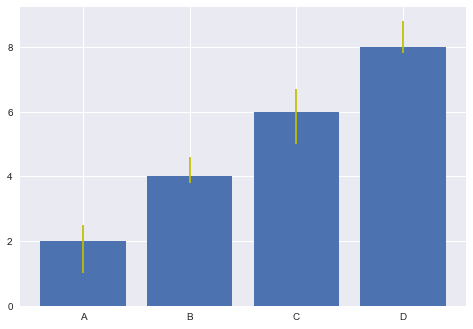

In [3]:
plt.close()
x = range(len(data["y"]))
y = data["y"] 
plt.bar(x, y)
plt.xticks(x, data["ID"])
plt.errorbar(x, y , yerr=(data["$\Delta$y lower bound"], data["$\Delta$y upper bound"]), fmt="none", ecolor='y')
plt.show()

In [4]:
def barplot_with_CI_errorbars(df, x_label, y_label, y_lower_label, y_upper_label):
    """Creates bar plot of a given dataframe with asymmetric error bars for y axis.
    
    Args:
        df: Pandas Dataframe that should have columns with columnnames specified in other arguments.
        x_label: str, column name of x axis categories
        y_label: str, column name of y axis values
        y_lower_label: str, column name of lower error values of y axis 
        y_upper_label: str, column name of upper error values of y axis 
    
    """
    # Column names for new columns for delta y_err which is calculated as | y_err - y |
    delta_lower_yerr_label = "$\Delta$"+y_lower_label
    delta_upper_yerr_label = "$\Delta$"+y_upper_label
    data = df # Pandas DataFrame
    data[delta_lower_yerr_label] = data[y_label] - data[y_lower_label]
    data[ delta_upper_yerr_label ] = data[y_upper_label] - data[y_label]
    
    # Color
    current_palette = sns.color_palette()
    sns_color = current_palette[1]

    #Plot style
    plt.close()
    plt.style.use(["seaborn-talk", "seaborn-whitegrid"])
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    
    # Plot
    x = range(len(data[y_label]))
    y = data[y_label] 
    plt.bar(x, y)
    plt.xticks(x, data[x_label])
    plt.errorbar(x, y , yerr=(data[delta_lower_yerr_label], data[delta_upper_yerr_label]), 
                 fmt="none", ecolor=sns_color, capsize=5, capthick=True)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

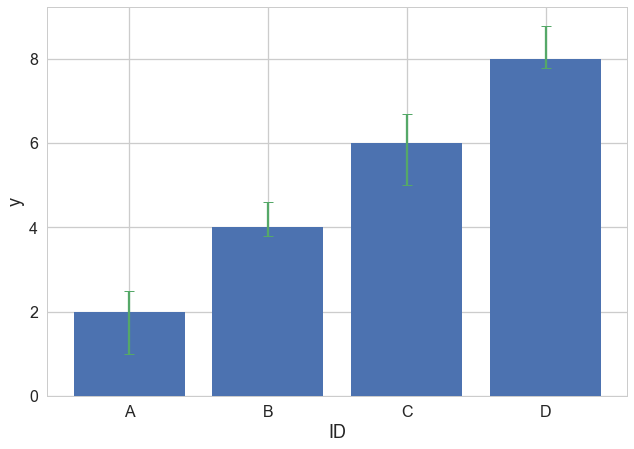

In [5]:
x = np.array(["A", "B", "C", "D"])
y = np.array([2, 4, 6, 8])
y_lower = np.array([1.0, 3.8, 5.0, 7.8])
y_upper = np.array([2.5, 4.6, 6.7, 8.8])

dataframe=pd.DataFrame({"ID": x, "y": y, "y lower bound": y_lower, "y upper bound": y_upper})

barplot_with_CI_errorbars(df=dataframe, x_label="ID", y_label="y", y_lower_label="y lower bound", y_upper_label = "y upper bound")
plt.show()

In [7]:
# Read statistics table
output_directory_path = "./analysis_of_typeIII_predictions/analysis_outputs_closest"
statistics_directory_path = os.path.join(output_directory_path, "StatisticsTables")

statistics_file_path = os.path.join(statistics_directory_path, "statistics.csv")
df_statistics = pd.read_csv(statistics_file_path)
df_statistics.head()

,ID,name,RMSE,RMSE_lower_bound,RMSE_upper_bound,MAE,MAE_lower_bound,MAE_upper_bound,ME,ME_lower_bound,ME_upper_bound,R2,R2_lower_bound,R2_upper_bound,m,m_lower_bound,m_upper_bound
0,xvxzd,Full quantum chemical calculation of free ener...,0.680076,0.547360,0.806001,0.578621,0.455862,0.698276,0.235172,0.008276,0.464138,0.937302,0.875323,0.974130,0.923111,0.840600,1.016554
1,gyuhx,S+pKa,0.729982,0.553305,0.903019,0.578667,0.437333,0.730333,0.009333,-0.271333,0.268333,0.925127,0.867335,0.962829,0.996287,0.909329,1.106428
2,xmyhm,ACD/pKa Classic,0.773914,0.471370,1.054664,0.545667,0.354000,0.778667,0.101667,-0.178333,0.381333,0.915851,0.824362,0.970761,0.980863,0.867486,1.111079
3,yqkga,ReSCoSS conformations // COSMOtherm pKa,0.902594,0.683993,1.119418,0.709667,0.503000,0.900000,-0.288333,-0.585333,0.036000,0.900614,0.823486,0.954172,0.999846,0.874116,1.124659
4,nb007,Epik-sequential,0.968208,0.761916,1.180795,0.810323,0.623871,1.018387,0.025161,-0.360323,0.354839,0.870680,0.752652,0.932446,0.873599,0.783489,0.972152


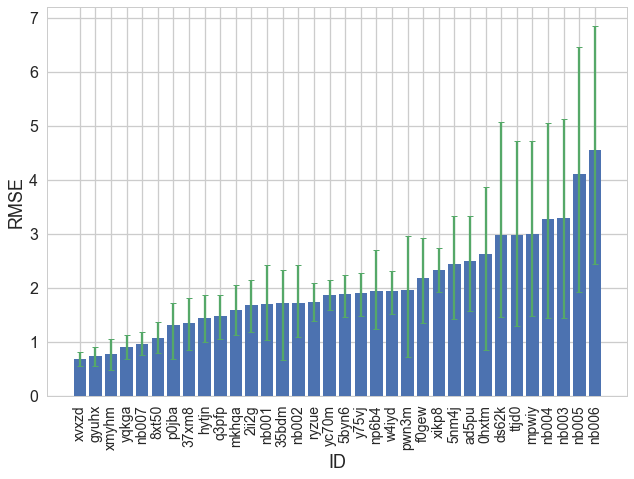

In [20]:
def barplot_with_CI_errorbars(df, x_label, y_label, y_lower_label, y_upper_label):
    """Creates bar plot of a given dataframe with asymmetric error bars for y axis.
    
    Args:
        df: Pandas Dataframe that should have columns with columnnames specified in other arguments.
        x_label: str, column name of x axis categories
        y_label: str, column name of y axis values
        y_lower_label: str, column name of lower error values of y axis 
        y_upper_label: str, column name of upper error values of y axis 
    
    """
    # Column names for new columns for delta y_err which is calculated as | y_err - y |
    delta_lower_yerr_label = "$\Delta$"+y_lower_label
    delta_upper_yerr_label = "$\Delta$"+y_upper_label
    data = df # Pandas DataFrame
    data[delta_lower_yerr_label] = data[y_label] - data[y_lower_label]
    data[ delta_upper_yerr_label ] = data[y_upper_label] - data[y_label]
    
    # Color
    current_palette = sns.color_palette()
    sns_color = current_palette[1]

    #Plot style
    plt.close()
    plt.style.use(["seaborn-talk", "seaborn-whitegrid"])
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 16
    
    # Plot
    x = range(len(data[y_label]))
    y = data[y_label] 
    plt.bar(x, y)
    plt.xticks(x, data[x_label], rotation=90)
    plt.errorbar(x, y , yerr=(data[delta_lower_yerr_label], data[delta_upper_yerr_label]), 
                 fmt="none", ecolor=sns_color, capsize=3, capthick=True)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

barplot_with_CI_errorbars(df=df_statistics, x_label="ID", y_label="RMSE", y_lower_label="RMSE_lower_bound", y_upper_label = "RMSE_upper_bound")
plt.show()